In [60]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from scipy.spatial import distance 
import math
from scipy.sparse import csr_matrix 
from sklearn.cluster import KMeans 
from sklearn.metrics import pairwise_distances 
import scipy.io as spio

In [61]:
#Data from http://www.cad.zju.edu.cn/home/dengcai/Data/MLData.html
data = spio.loadmat('COIL20.mat')
X = data['X']
Y = data['Y']
y=np.zeros((1440))
for k in range(1,21):
    for i in range(1440):
        if Y[i]==[k]:
            y[i]=k
X.shape, y.shape 

((1440, 1024), (1440,))

In [62]:
#centroid
a=np.zeros(X.shape[1])
for i in range(0,X.shape[1]):
    a[i]=np.dot(X.T[i],np.ones(X.shape[0]))/X.shape[0]
a=np.matrix(a)
a.shape

(1, 1024)

In [63]:
#radius
dists = distance.cdist(X, a, 'euclidean')
R=np.max(dists)
R

11.620077689156282

In [64]:
#Inverse Stereographic Projection
Xf=np.zeros((X.shape[0],X.shape[1]))
Xe=np.zeros((X.shape[0]))
for i in range(0,X.shape[0]):
    Xe[i]=R*((np.dot(X[i]**2,np.ones(X.shape[1]))-math.pow(R,2))/((np.dot(X[i]**2,np.ones(X.shape[1])))+math.pow(R,2)))
    Xf[i]=R*(2*R/((np.dot(X[i]**2,np.ones(X.shape[1])))+math.pow(R,2))*X[i])
    
X=np.column_stack((Xf, Xe)) 
X.shape

(1440, 1025)

In [65]:
#Distance matrix
A=np.dot(X,X.T)/(R**2)
for i in range(0,X.shape[0]):
        A[i][i]=int(1)
A=R*np.arccos(A)
A.shape

(1440, 1440)

In [66]:
# get indices and sorted distances
k=10
DNN, NN = np.sort(A), np.argsort(A)
NN = NN[:,1:k+1]
DNN = DNN[:,1:k+1]

In [67]:
#Similarity Matrix
W=csr_matrix((X.shape[0], X.shape[0])).toarray()
for i in range(W.shape[0]):
    for j in range(W.shape[0]):
        if (j in NN[i]) :
            W[i,j] = np.exp(-(A[i,j]**2)/1000000)
        else:
            W[i][j]=0
W=(W+W.T)/2

In [68]:
# degree matrix
D = np.diag(np.sum(np.array(W), axis=1))
print('degree matrix:')
print(D)
# laplacian matrix
L = D - W
print('laplacian matrix:')
print(L)

degree matrix:
[[10.99993176  0.          0.         ...  0.          0.
   0.        ]
 [ 0.         10.4999365   0.         ...  0.          0.
   0.        ]
 [ 0.          0.         10.49993261 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  9.499908    0.
   0.        ]
 [ 0.          0.          0.         ...  0.          8.49991873
   0.        ]
 [ 0.          0.          0.         ...  0.          0.
   9.99990773]]
laplacian matrix:
[[10.99993176 -0.99999928 -0.99999691 ...  0.          0.
   0.        ]
 [-0.99999928 10.4999365  -0.99999865 ...  0.          0.
   0.        ]
 [-0.99999691 -0.99999865 10.49993261 ...  0.          0.
   0.        ]
 ...
 [ 0.          0.          0.         ...  9.499908   -0.99999566
  -0.99999206]
 [ 0.          0.          0.         ... -0.99999566  8.49991873
  -0.99999413]
 [ 0.          0.          0.         ... -0.99999206 -0.99999413
   9.99990773]]


In [69]:
# eigenvalues
e, v = np.linalg.eig(L)
idx=np.argsort(e)
e=e[idx]
#v=v[:,idx[1:2]]

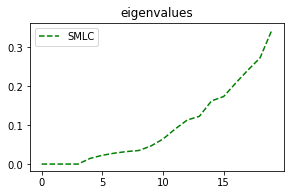

In [70]:
#The 20 smallest eigenvalues of the SLMC Laplacian matrice 
fig = plt.figure(figsize=[10, 6])
ax1 = plt.subplot(222)
plt.plot(e.real[0:20],color='green',linestyle='dashed', label='SMLC')
ax1.title.set_text('eigenvalues')
plt.legend()

In [71]:
#clustering
U = np.array(v.real[:,idx[0:20]])
km = KMeans(init='k-means++', n_clusters=20)
km.fit(U)

KMeans(n_clusters=20)

In [72]:
# NMI value
from sklearn.metrics.cluster import normalized_mutual_info_score
normalized_mutual_info_score(y,km.labels_,average_method='arithmetic')

0.8808686981357986